##Importing MNIST dataset from keras.datasets

In [1]:
from keras.datasets import mnist 

Using TensorFlow backend.


###Loading the data and dividing it into training and testing data 

In [0]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

###Shape of the data 

In [3]:
print('Shape of X_train : ',X_train.shape) 
print('Shape of X_test : ',X_test.shape)
print('Shape of Y_train : ',Y_train.shape)
print('Shape of Y_test : ',Y_test.shape)

Shape of X_train :  (60000, 28, 28)
Shape of X_test :  (10000, 28, 28)
Shape of Y_train :  (60000,)
Shape of Y_test :  (10000,)


There are 60000 training images of size (28 x 28)
and 10,000 testing images of size (28 x28)

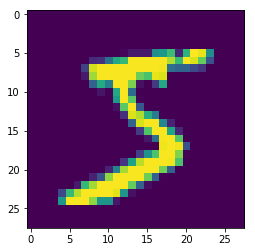

In [17]:
import matplotlib.pyplot as plt 

plt.imshow(X_train[0])
plt.show()

Data is in the form of arrays 

In [4]:
print(X_train[0])        

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Normalizing the data 

In [0]:
X_train=X_train/255.0
X_test=X_test/255.0

In [6]:
print(X_train[0])            # pixel values are in the range (0-1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

###Labels

In [7]:
print(Y_train) 

type(Y_train)

[5 0 4 ... 5 6 8]


numpy.ndarray

In [8]:
Y_train[0]

5

###One -hot Encoding the labels using the 'to_categorical' function of keras 

In [0]:
from keras.utils import np_utils

Y_train=np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)

In [10]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Creating the Model 

In [0]:
from keras.models import Sequential
from keras import layers 

In [0]:
model = Sequential()

model.add(layers.Flatten())                       # Flatten : Treating each pixel as a neuron 

model.add(layers.Dense(128, activation='relu'))   # Adding layer with 128 neurons 

model.add(layers.Dense(128, activation='relu'))   # Adding layer with 128 neurons 

model.add(layers.Dense(10, activation='softmax'))  # Adding layer wiht 10 neurons and activation as softmax(calculates probability of each class)


##Compiling the Model 

In [14]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


##Training the Model 

In [18]:
model.fit(X_train,Y_train,
         epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.2316 - acc: 0.9317
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0940 - acc: 0.9716
Epoch 3/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0663 - acc: 0.9788
Epoch 4/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0504 - acc: 0.9840
Epoch 5/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0408 - acc: 0.9868
Epoch 6/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0325 - acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0280 - acc: 0.9909
Epoch 8/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0230 - acc: 0.9924
Epoch 9/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0212 - acc: 0.9929
Epoch 10/10
60000/60000 [==================

##Testing the Model 

In [19]:
results= model.evaluate(X_test,Y_test)

print('Test loss =',results[0])
print('Test accuracy =',results[1])

10000/10000 [==============================] - 0s 37us/step
Test loss = 0.10476228554524424
Test accuracy = 0.9762
